In [ ]:
# https://github.com/summer4an/mosaic_detector
import cv2
import numpy as np
from IPython.display import display
from PIL import Image
from time import time_ns

def d_gray(i):
    display(Image.fromarray(cv2.convertScaleAbs(i)))


def d_rgb(i):
    rgb = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(rgb))


mosaic_conv = {}
point_conv = {}
for mosaic_size in range(10, 25):
    conv_size = 2 + mosaic_size + mosaic_size - 1 + 2
    img = np.ones((conv_size, conv_size, 1), np.uint8) * 255
    for i in range(2, conv_size, mosaic_size - 1):
        for j in range(2, conv_size, mosaic_size - 1):
            for k in range(0, conv_size):
                img[i, k] = 0
                img[k, j] = 0
    mosaic_conv.update({mosaic_size: img})

    size_factor = 3 * 2 + 1
    conv_size = mosaic_size * (size_factor - 1) + 1
    img = np.zeros((conv_size, conv_size, 1), np.uint8)
    for i in range(size_factor):
        for j in range(size_factor):
            img[i * mosaic_size, j * mosaic_size] = 1
    point_conv.update({mosaic_size: img.astype(np.float64)})

image = cv2.imread("E:/Dataset/amakano2/720p/e_yuu17N_1.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = 255 - cv2.Canny(gray, 10, 20)
gray = cv2.GaussianBlur(gray, (3, 3), 0)


for size, conv in mosaic_conv.items():
    start = time_ns()
    match_conv = cv2.matchTemplate(gray, conv, cv2.TM_CCOEFF_NORMED) * 255
    print((time_ns()-start)/1e9)
    if np.max(match_conv) >= 150:
        print(size)
        re, threshold = cv2.threshold(match_conv, 100, 255, cv2.THRESH_BINARY)
        start = time_ns()
        blur = cv2.filter2D(
            threshold, -1, point_conv[size - 1], borderType=cv2.BORDER_CONSTANT
        )
        print((time_ns()-start)/1e9)
        loc = np.where(match_conv + np.clip(blur, 0, 40) >= 80)
        for pt in zip(*loc[::-1]):
            cv2.rectangle(
                image, pt, (pt[0] + 2 * size, pt[1] + 2 * size), (0, 0, 0), -1
            )
        break

d_rgb(image)

In [75]:
import cv2
import numpy as np
from IPython.display import display
from PIL import Image
import os
from os.path import join
import shutil
from time import time_ns

hr_folder = "R:/hr75"
hr_remove_folder = "R:/hr_remove75/"
lr_folder = "R:/lr75"
lr_remove_folder = "R:/lr_remove75/"

for folder_path in [hr_remove_folder, lr_remove_folder]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)


mosaic_size = 9

conv_size = 2 + mosaic_size + mosaic_size - 1 + 2
mosaic_conv = np.ones((conv_size, conv_size, 1), np.uint8) * 255
for i in range(2, conv_size, mosaic_size - 1):
    for j in range(2, conv_size, mosaic_size - 1):
        for k in range(0, conv_size):
            mosaic_conv[i, k] = 0
            mosaic_conv[k, j] = 0


for root, dirs, files in os.walk(lr_folder):
    for file in files:
        if "png" in file or "webp" in file:
            img = cv2.imread(join(root, file))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            gray = 255 - cv2.Canny(gray, 10, 20)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            match = cv2.matchTemplate(gray, mosaic_conv, cv2.TM_CCOEFF_NORMED) * 255
            if "e_chi12N_1_2_2" in file:
                print(np.max(match))
            if (m := np.max(match)) >= 120:
                print(file, m)
                shutil.move(join(lr_folder, file), join(lr_remove_folder, file))
                shutil.move(join(hr_folder, file), join(hr_remove_folder, file))

105.993004


In [88]:
import cv2
import numpy as np
from IPython.display import display
from PIL import Image
import os
from os.path import join
import shutil
from time import time_ns

hr_folder = "R:/hr50"
hr_remove_folder = "R:/hr_remove_low50/"
hr_small = "R:/hr_combine"
lr_folder = "R:/lr50"
lr_remove_folder = "R:/lr_remove_low50/"
lr_small = "R:/lr_combine"

l1 = []
l2 = []

for folder_path in [hr_remove_folder, lr_remove_folder, hr_small, lr_small]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)


def d_rgb(i):
    rgb = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(rgb))

for root, dirs, files in os.walk(lr_folder):
    for file in files:
        if "png" in file or "webp" in file:
            img = cv2.imread(join(lr_folder, file))
            img2 = cv2.imread(join(hr_folder, file))
            match = np.abs(cv2.Laplacian(img, cv2.CV_64F))
            match2 = np.abs(cv2.Laplacian(img2, cv2.CV_64F))
            # l1.append(np.average(match))
            # l2.append(np.average(match2))
            # only extract high freq image to _small
            if np.average(match) >= 14:
                shutil.copy(join(lr_folder, file), join(lr_small, "50"+file))
                shutil.copy(join(hr_folder, file), join(hr_small, "50"+file))
            # # remove low freq image
            # if np.max(match) < 100 and np.max(match2) < 150:
                # shutil.move(join(lr_folder, file), join(lr_remove_folder, file))
                # shutil.move(join(hr_folder, file), join(hr_remove_folder, file))
            

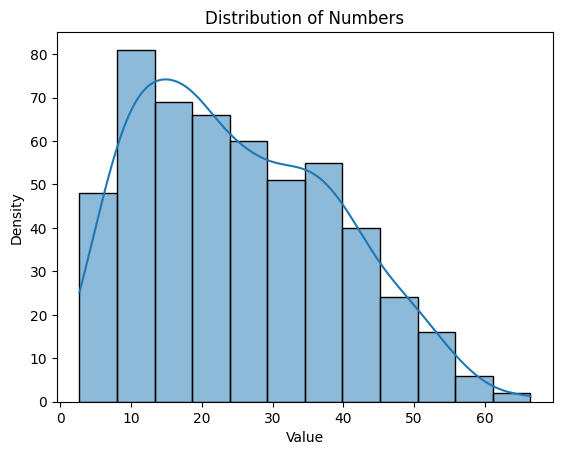

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot
sns.histplot(l1, kde=True)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Numbers')

# Display the plot
plt.show()
